## What is Feature Engineering?

Feature Engineering is the process of transforming raw data into meaningful features that improve the performance of machine learning models.

- "Features" = input variables (independent variables).
- Good features help models learn patterns more effectively.


### Encoding 

Encoding is the process of converting categorical (non-numeric) data into numeric form so that machine learning models can process it.

- Most ML algorithms (e.g., Linear Regression, SVM, KNN) only work with numbers.
- Encoding ensures categorical values carry meaningful information without introducing bias.

The choice of encoding depends on **the type of categorical variable** and the **nature of the dataset**.  

### Types of Categorical Variables

1. Binary - Variables with two categories (e.g yes/no, true/false)
2. Nominal - Variables with two or more unordered categories (e.g colors, countries)
3. Ordinal - Variables with two or more ordered categories (e.g education level, customer satisfaction)
4. High Cardinality - Represents categorical variables with a very large number of unique categories

### Types of Encoding

### One-Hot Encoding

One-Hot Encoding converts categorical values into multiple binary (0/1) columns, one for each category.

- Best for nominal categories (no order).
- Avoids false ordering introduced by Label Encoding.

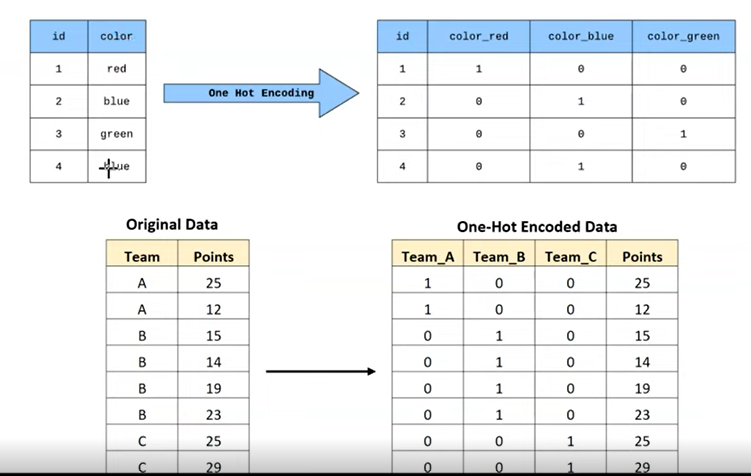
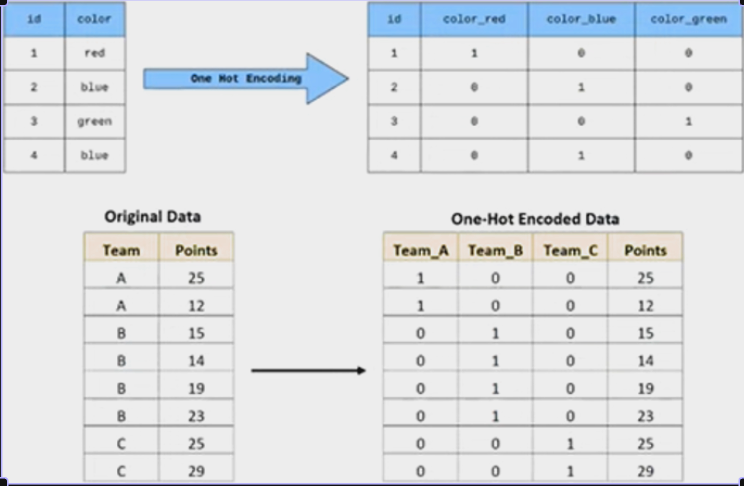

### Disadvantages

- Can lead to high dimensionality (too many columns) if categories are many (e.g., 10,000 cities → 10,000 new columns).
- Not efficient for high-cardinality features.

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red']})
df

,Color
0,Red
1,Blue
2,Green
3,Blue
4,Red


In [4]:
# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Color'], dtype=int)

print(df_encoded)

   Color_Blue  Color_Green  Color_Red
0           0            0          1
1           1            0          0
2           0            1          0
3           1            0          0
4           0            0          1


#### Label Encoding
Label Encoding assigns a unique integer to each category in a categorical feature.

- Useful when the categories are ordinal (have an order).
- Not ideal for nominal data (unordered categories) because the model may think one value is “greater” than another.

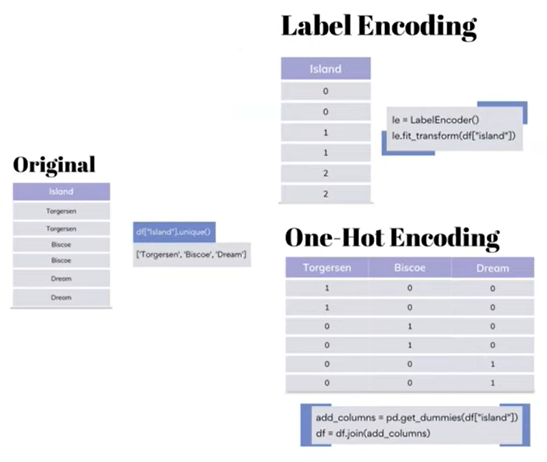

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [6]:
df = pd.DataFrame({'Size': ['Small', 'Medium', 'Large', 'Medium', 'Small', 'Large']})
df

,Size
0,Small
1,Medium
2,Large
3,Medium
4,Small
5,Large


In [19]:
# Initialize Label Encoder
encoder = LabelEncoder()

# Fit and transform
df['Size_encoded'] = encoder.fit_transform(df['Size'])

print(df)

     Size  Size_encoded
0   Small             2
1  Medium             1
2   Large             0
3  Medium             1
4   Small             2
5   Large             0


### Ordinal Encoding

Ordinal Encoding assigns integer values to categories that have a natural order (ranking).

- Unlike Label Encoding (which may wrongly imply order), Ordinal Encoding is used only when the order is meaningful.
- Example features: Education level, Customer satisfaction, Movie ratings, Shirt size.

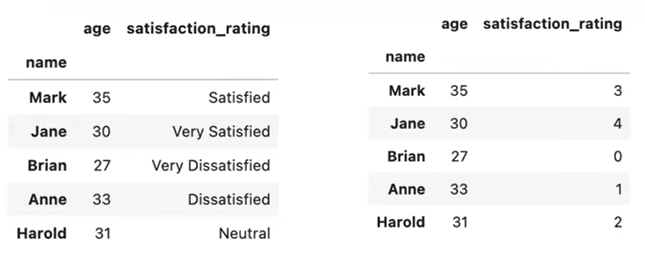

In [7]:
from sklearn.preprocessing import OrdinalEncoder

In [8]:
df = pd.DataFrame({'Education': ['High School', 'Bachelor', 'Master', 'PhD', 'Bachelor']})
df

,Education
0,High School
1,Bachelor
2,Master
3,PhD
4,Bachelor


In [9]:
# Define the order
edu_order = [['High School', 'Bachelor', 'Master', 'PhD']]
edu_order

[['High School', 'Bachelor', 'Master', 'PhD']]

In [10]:
# Apply Ordinal Encoding
encoder = OrdinalEncoder(categories=edu_order)
df['Education_encoded'] = encoder.fit_transform(df[['Education']])
print(df)

     Education  Education_encoded
0  High School                0.0
1     Bachelor                1.0
2       Master                2.0
3          PhD                3.0
4     Bachelor                1.0


### Binary Encoding

Assign a unique binary code to each category

- Each category is first converted into an integer (like Label Encoding).
- Then, that integer is converted into binary digits (0s and 1s).
- Finally, each binary digit becomes a separate column.

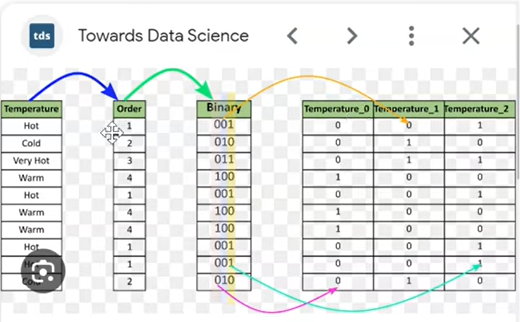

`pip install category_encoders`

In [7]:
from category_encoders import BinaryEncoder

In [8]:
df = pd.DataFrame({'Color': ['Red', 'Green', 'Blue', 'Yellow', 'Red']})
df

,Color
0,Red
1,Green
2,Blue
3,Yellow
4,Red


In [16]:
# Apply Binary Encoding
encoder = BinaryEncoder(cols=['Color'])
df_encoded = encoder.fit_transform(df)
print(df_encoded)

   Color_0  Color_1  Color_2
0        0        0        1
1        0        1        0
2        0        1        1
3        1        0        0
4        0        0        1


### Target Encoding

Target Encoding replaces a categorical value with a number based on the target variable.

- Example: If you’re predicting churn (Yes/No), each category (e.g., city) is encoded by the churn rate in that city.

| City    | Churn (Target) |
| ------- | -------------- |
| Nairobi | 1              |
| Nairobi | 0              |
| Mombasa | 1              |
| Kisumu  | 0              |
| Mombasa | 1              |


Step 1: Compute mean churn per city

- Nairobi: (1+0)/2 = 0.5
- Mombasa: (1+1)/2 = 1.0
- Kisumu: (0)/1 = 0.0

Step 2: Replace city with target mean

| City    | Churn | Encoded\_City |
| ------- | ----- | ------------- |
| Nairobi | 1     | 0.5           |
| Nairobi | 0     | 0.5           |
| Mombasa | 1     | 1.0           |
| Kisumu  | 0     | 0.0           |
| Mombasa | 1     | 1.0           |


In [9]:
from category_encoders import TargetEncoder

In [10]:
df = pd.DataFrame({
    'City': ['Nairobi', 'Nairobi', 'Mombasa', 'Kisumu', 'Mombasa'],
    'Churn': [1, 0, 1, 0, 1]
})
df

,City,Churn
0,Nairobi,1
1,Nairobi,0
2,Mombasa,1
3,Kisumu,0
4,Mombasa,1


In [22]:
# Apply Target Encoding
encoder = TargetEncoder(cols=['City'])
df_encoded = encoder.fit_transform(df['City'], df['Churn'])

df['Encoded_City'] = df_encoded
print(df)

      City  Churn  Encoded_City
0  Nairobi      1      0.585815
1  Nairobi      0      0.585815
2  Mombasa      1      0.656740
3   Kisumu      0      0.521935
4  Mombasa      1      0.656740


- If a category has very few samples (like Kisumu with only 1 row), its target mean (0.0) might be unreliable.
- To prevent overfitting, the encoder blends the global mean of the target with the category mean.

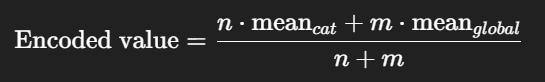

where:

- n = number of samples in the category
- mean 𝑐𝑎𝑡 = category target mean
- mean 𝑔𝑙𝑜𝑏𝑎𝑙 = global mean of target (in the dataset it’s (1+0+1+0+1)/5 = 0.6)
- m = smoothing factor (default is often around 2, 5, or higher depending on the library)

### Frequency Encoding

- Frequency Encoding replaces each category with the frequency (count) of that category in the dataset.
- Instead of creating multiple columns (like One-Hot), it uses a single column with numeric values.

| City    | Churn |
| ------- | ----- |
| Nairobi | 1     |
| Nairobi | 0     |
| Mombasa | 1     |
| Kisumu  | 0     |
| Mombasa | 1     |

Step 1: Count frequency of each category

- Nairobi → appears 2 times
- Mombasa → appears 2 times
- Kisumu → appears 1 time

Step 2: Replace categories with frequencies

| City    | Churn | Encoded\_City |
| ------- | ----- | ------------- |
| Nairobi | 1     | 2             |
| Nairobi | 0     | 2             |
| Mombasa | 1     | 2             |
| Kisumu  | 0     | 1             |
| Mombasa | 1     | 2             |

In [23]:
data = {
    'City': ['Nairobi', 'Nairobi', 'Mombasa', 'Kisumu', 'Mombasa'],
    'Churn': [1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)
df

,City,Churn
0,Nairobi,1
1,Nairobi,0
2,Mombasa,1
3,Kisumu,0
4,Mombasa,1


In [24]:
# Frequency Encoding
freq_map = df['City'].value_counts().to_dict()
df['Encoded_City'] = df['City'].map(freq_map)

print(df)

      City  Churn  Encoded_City
0  Nairobi      1             2
1  Nairobi      0             2
2  Mombasa      1             2
3   Kisumu      0             1
4  Mombasa      1             2


- Useful when categories are many (e.g., city names, product IDs).
- Keeps the data compact compared to One-Hot.
- Works well with tree-based models (Random Forest, XGBoost).

## Choosing the Right Encoding Technique

Feature encoding is crucial when working with categorical data in machine learning.  
The choice of encoding depends on **the type of categorical variable** and the **nature of the dataset**.  

---

### 1. **Label Encoding**
- **Best for**: Ordinal categorical variables (where categories have a natural order).  
- **Example**: Education level → {Primary: 1, Secondary: 2, University: 3}.  
- **Why**: Retains the order/relationship between categories.  
- Not suitable for nominal data (no natural order) because it introduces unintended hierarchy.

---

### 2. **One-Hot Encoding**
- **Best for**: Nominal categorical variables (no natural order).  
- **Example**: Colors → {Red, Blue, Green} → `Color_Red, Color_Blue, Color_Green`.  
- **Why**: Prevents introducing order where none exists.  
- May cause **high dimensionality** if the variable has many categories (e.g., thousands of cities).

---

### 3. **Binary Encoding**
- **Best for**: High cardinality categorical variables.  
- **Example**: Countries with 200+ categories.  
- **How it works**: Converts categories into integers, then into binary digits split into separate columns.  
- **Why**: Reduces dimensionality compared to One-Hot Encoding.  
- Can be harder to interpret.

---

### 4. **Target Encoding**
- **Best for**: High cardinality categorical variables with a strong relationship to the target variable.  
- **Example**: Encoding "City" by the mean churn rate in each city.  
- **Why**: Captures useful statistical information.  
- Risk of **data leakage** → must be applied carefully (e.g., using cross-validation).

---

### 5. **Frequency Encoding**
- **Best for**: When category frequency carries useful signal.  
- **Example**: Encoding products by how often they are purchased.  
- **Why**: Keeps dataset compact while reflecting category importance.  
- May not capture relationships with the target variable directly.

---

#### Summary
- **Ordinal categories** → Use **Label Encoding**.  
- **Nominal categories with few unique values** → Use **One-Hot Encoding**.  
- **High cardinality categories** → Use **Binary or Target Encoding**.  
- **When category frequency matters** → Use **Frequency Encoding**.  

Always consider **dataset size, cardinality, and risk of data leakage** before choosing the encoding method.
